In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = './ai4i2020.csv'
data = pd.read_csv(file_path)
data.head()

,UID,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Summary statistics
summary_statistics = data.describe()
print(summary_statistics)

               UID  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

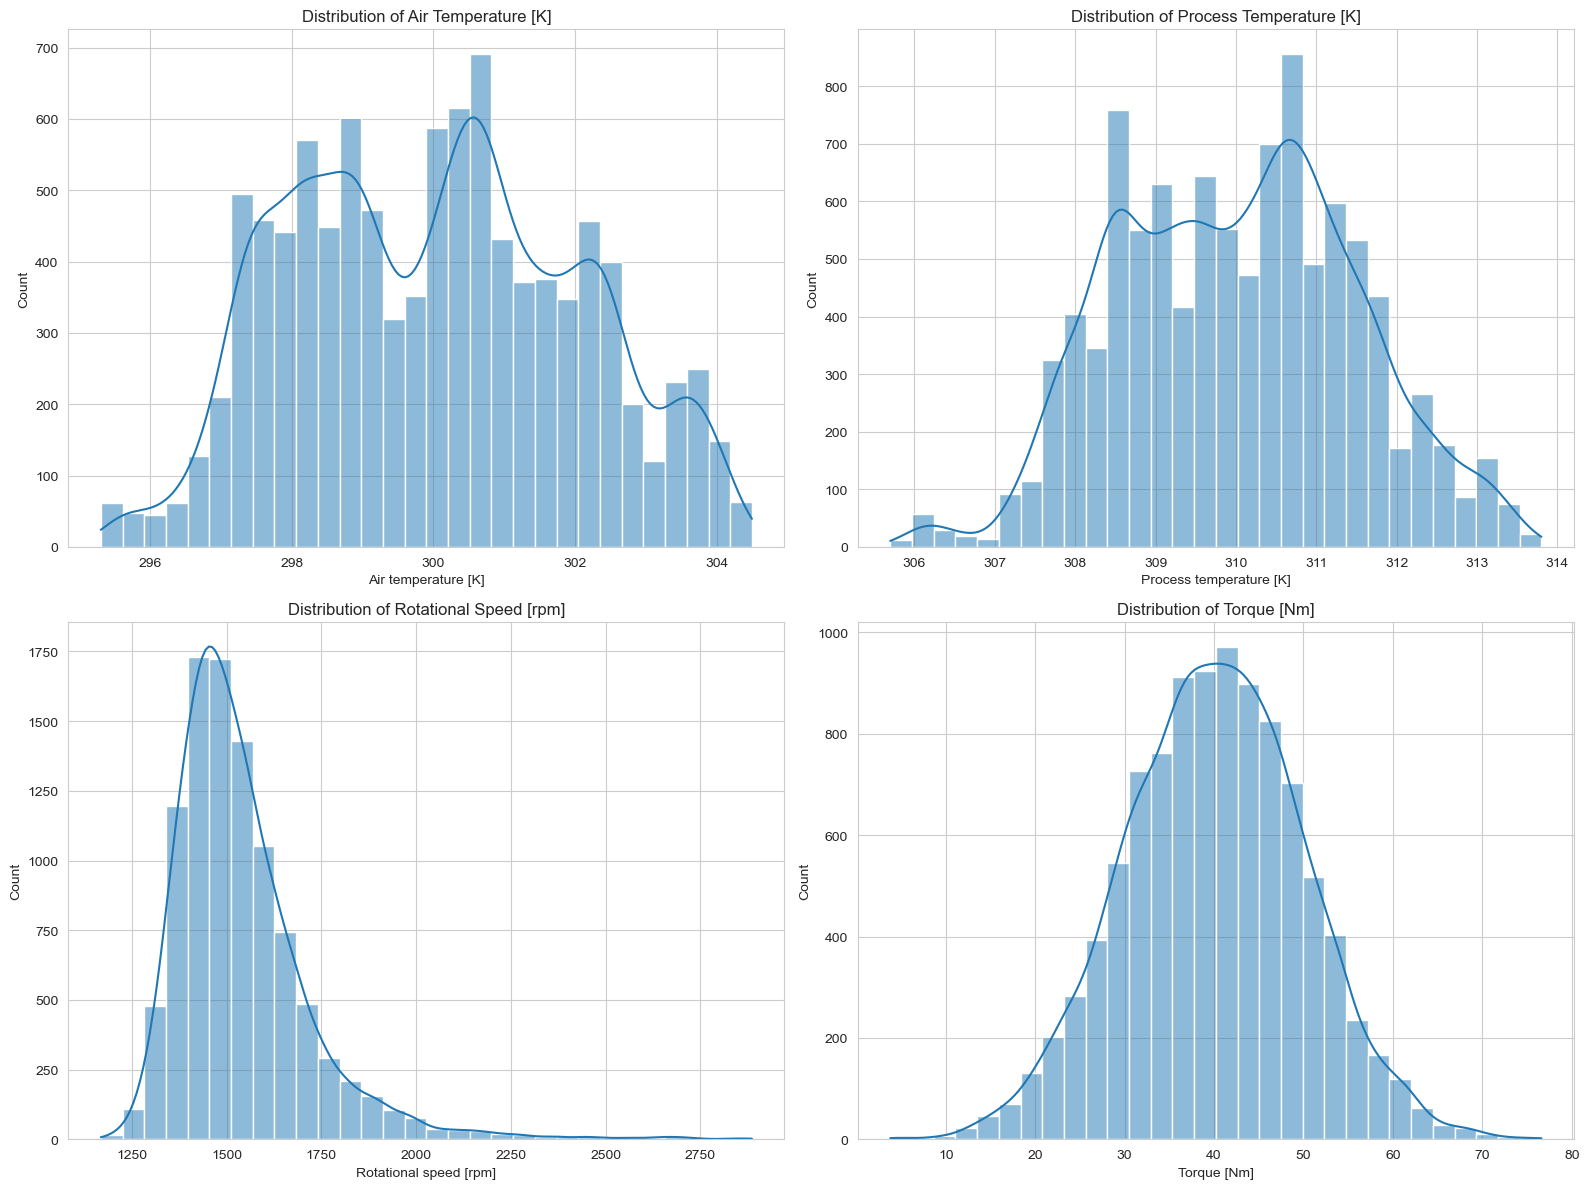

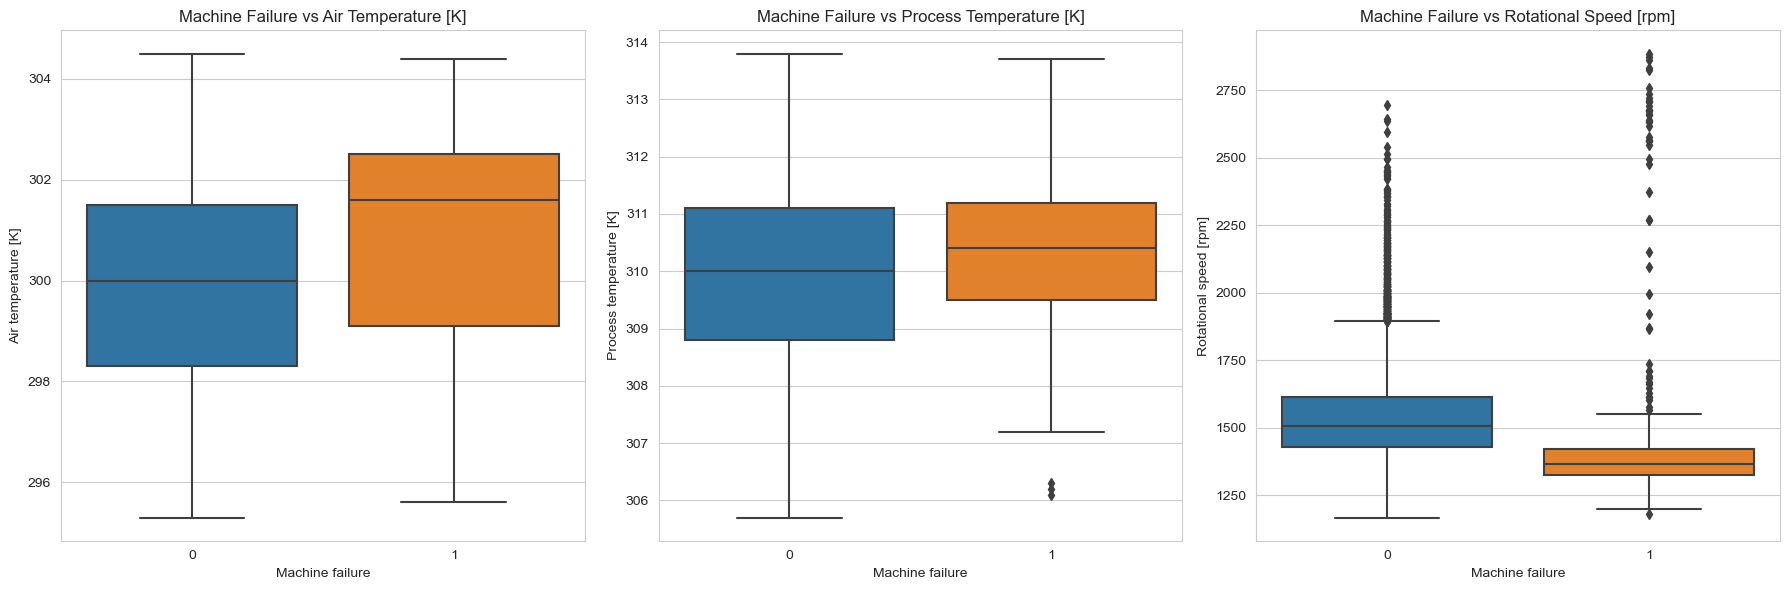

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for air temperature, process temperature, rotational speed, and torque
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data['Air temperature [K]'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Air Temperature [K]')

sns.histplot(data['Process temperature [K]'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Process Temperature [K]')

sns.histplot(data['Rotational speed [rpm]'], bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Rotational Speed [rpm]')

sns.histplot(data['Torque [Nm]'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Torque [Nm]')

plt.tight_layout()
plt.show()

# Boxplot to see the relationship between machine failure and some variables
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Machine failure', y='Air temperature [K]', data=data, ax=ax[0])
ax[0].set_title('Machine Failure vs Air Temperature [K]')

sns.boxplot(x='Machine failure', y='Process temperature [K]', data=data, ax=ax[1])
ax[1].set_title('Machine Failure vs Process Temperature [K]')

sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=data, ax=ax[2])
ax[2].set_title('Machine Failure vs Rotational Speed [rpm]')

plt.tight_layout()
plt.show()

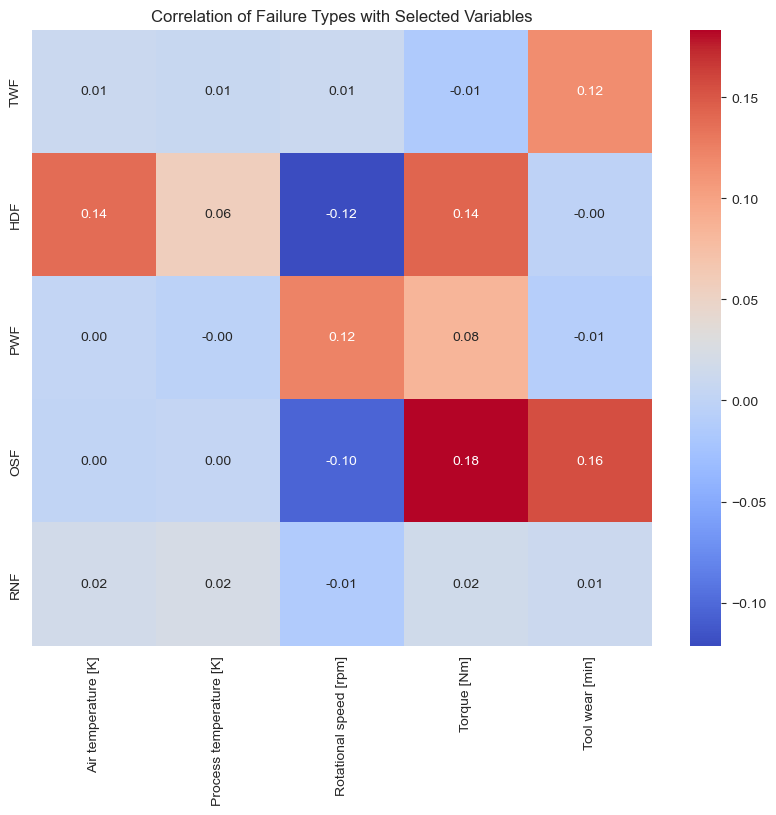

In [10]:
# Calculate correlations between failure types and selected continuous variables
correlation_matrix = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']].corr()

# Extract correlations of failure types with other variables
failure_correlations = correlation_matrix.loc[['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

# Plotting the correlation matrix of failure types with different factors
plt.figure(figsize=(10, 8))
sns.heatmap(failure_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Failure Types with Selected Variables')
plt.show()


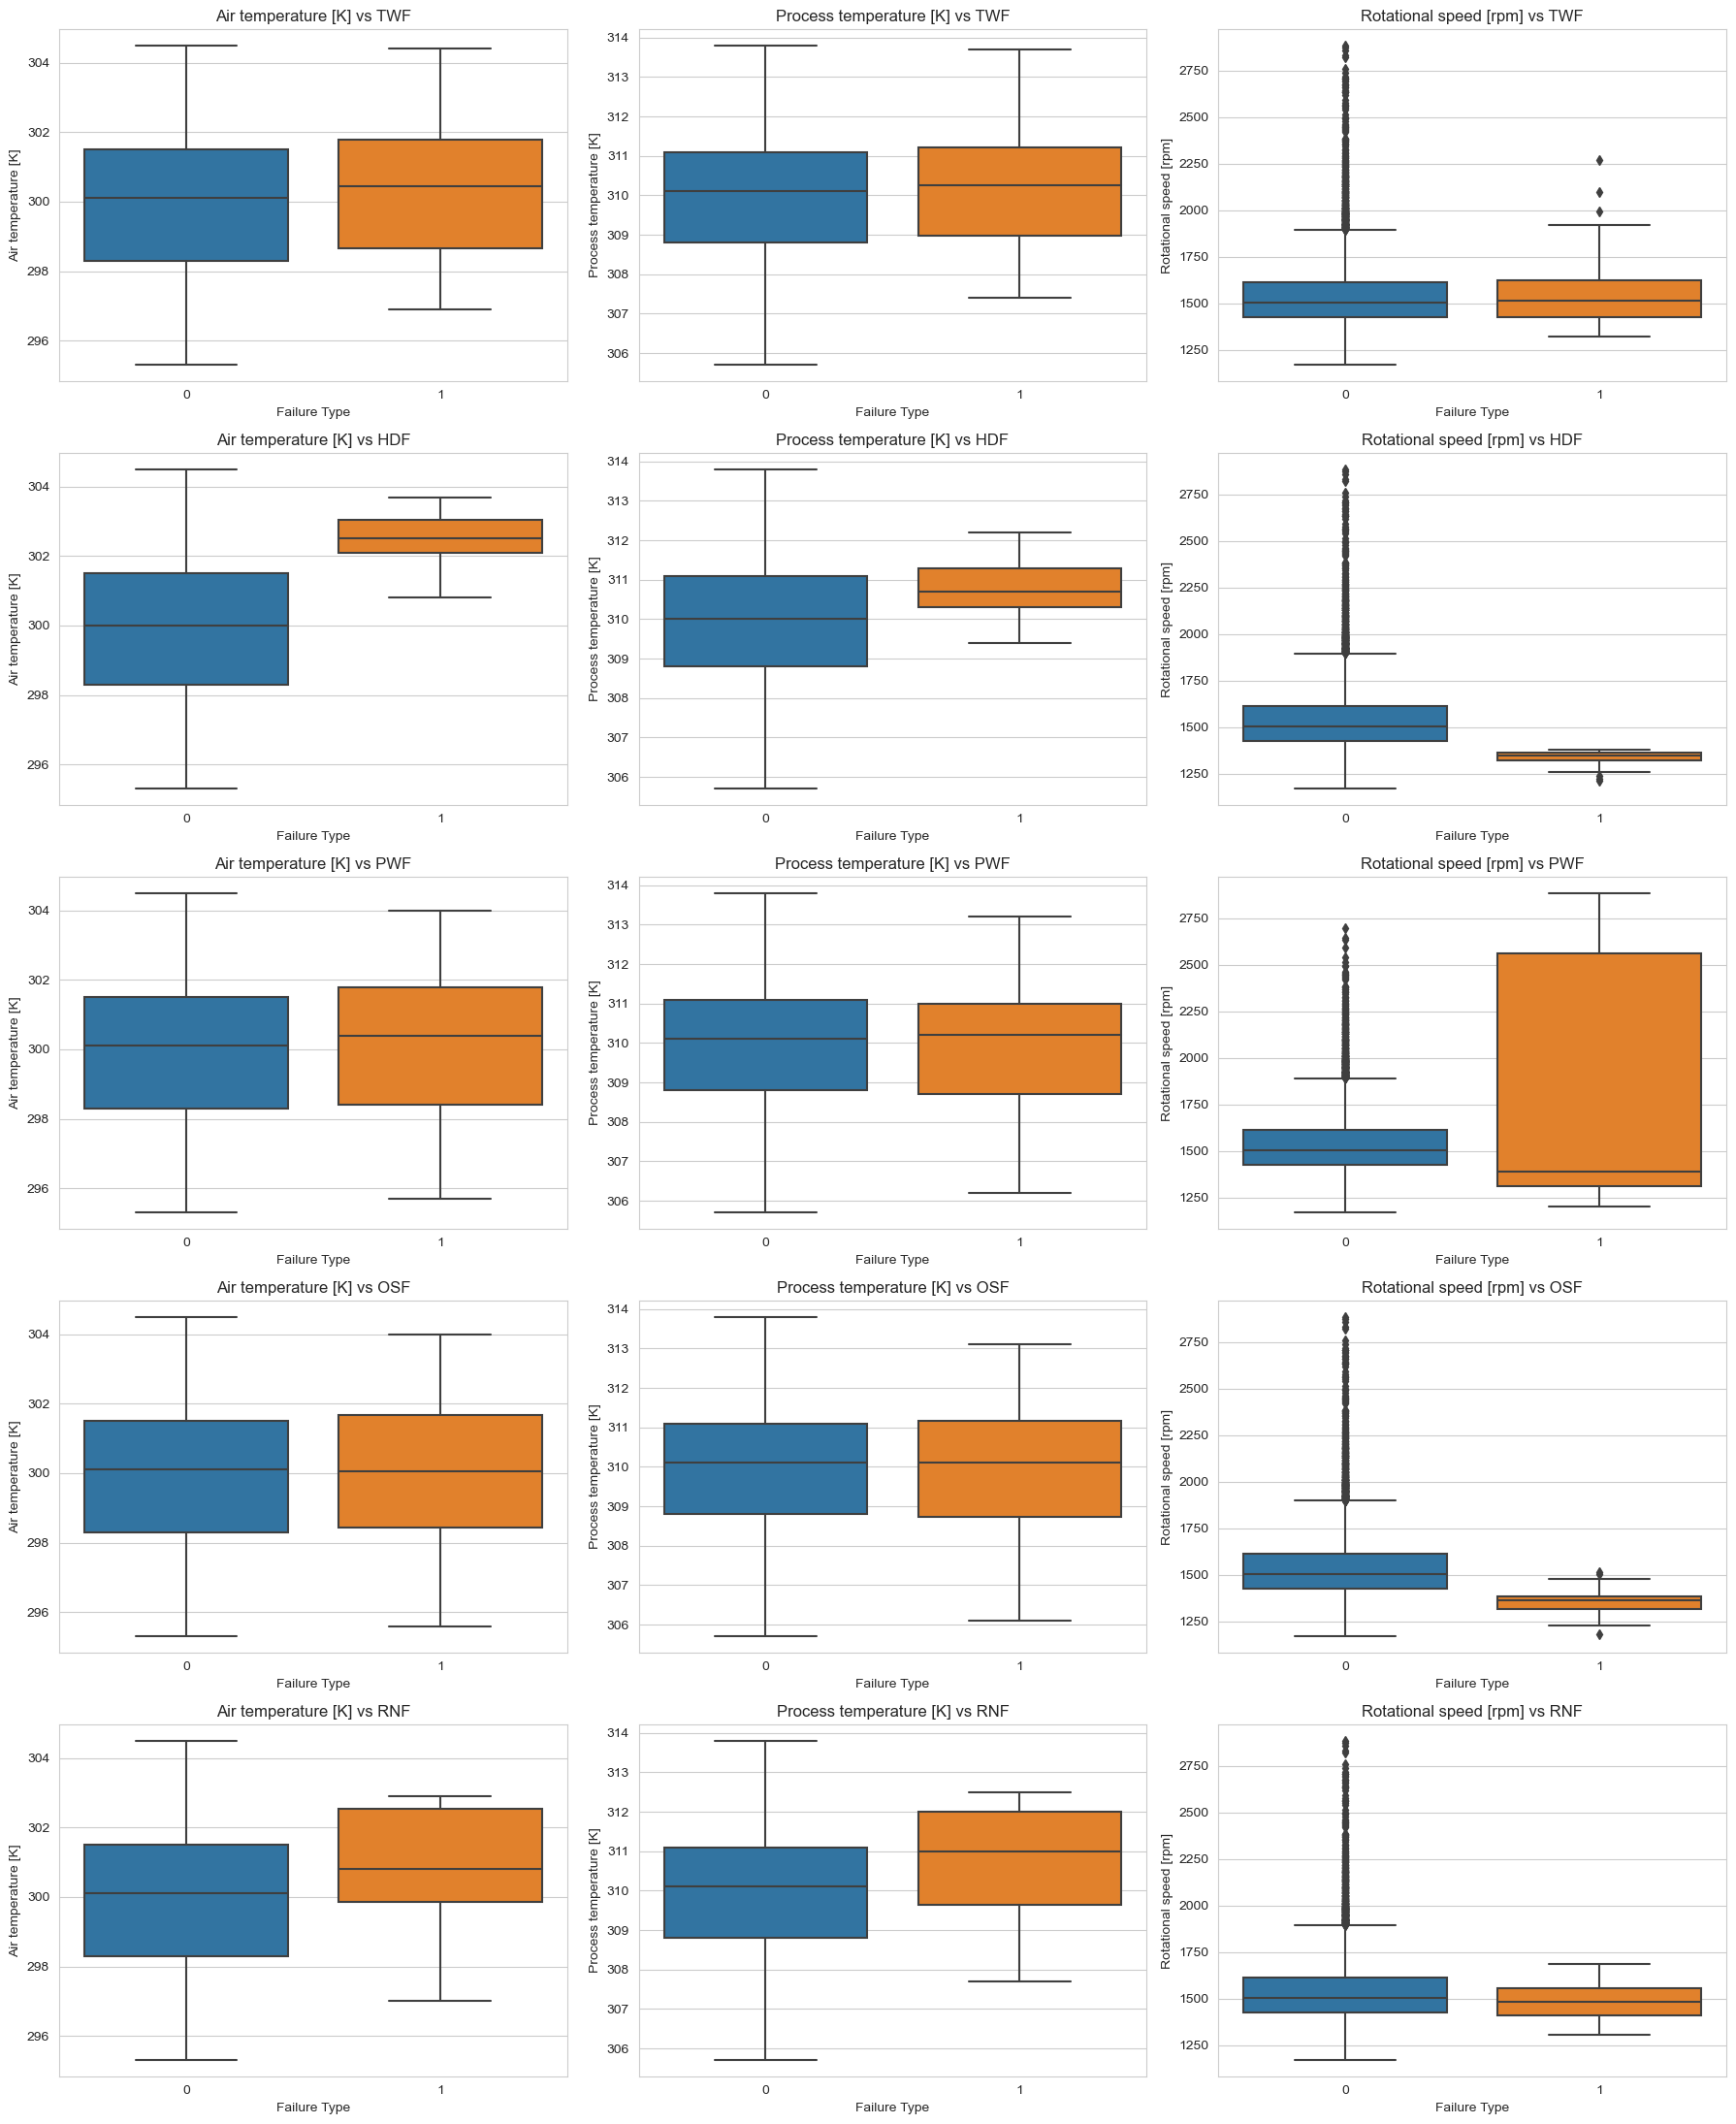

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating box plots for failure types against air temperature, process temperature, and rotational speed
fig, axes = plt.subplots(5, 3, figsize=(18, 22)) # Adjust the size as needed
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF'] # The binary failure types
variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'] # Continuous variables

for i, failure_type in enumerate(failure_types):
    for j, variable in enumerate(variables):
        sns.boxplot(x=failure_type, y=variable, data=data, ax=axes[i, j])
        axes[i, j].set_title(f'{variable} vs {failure_type}')
        axes[i, j].set_xlabel('Failure Type')
        axes[i, j].set_ylabel(variable)

plt.tight_layout()
plt.show()


## Focus on pure machine failures

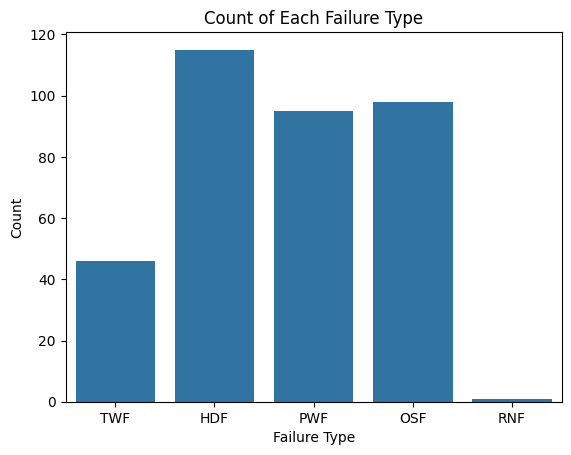

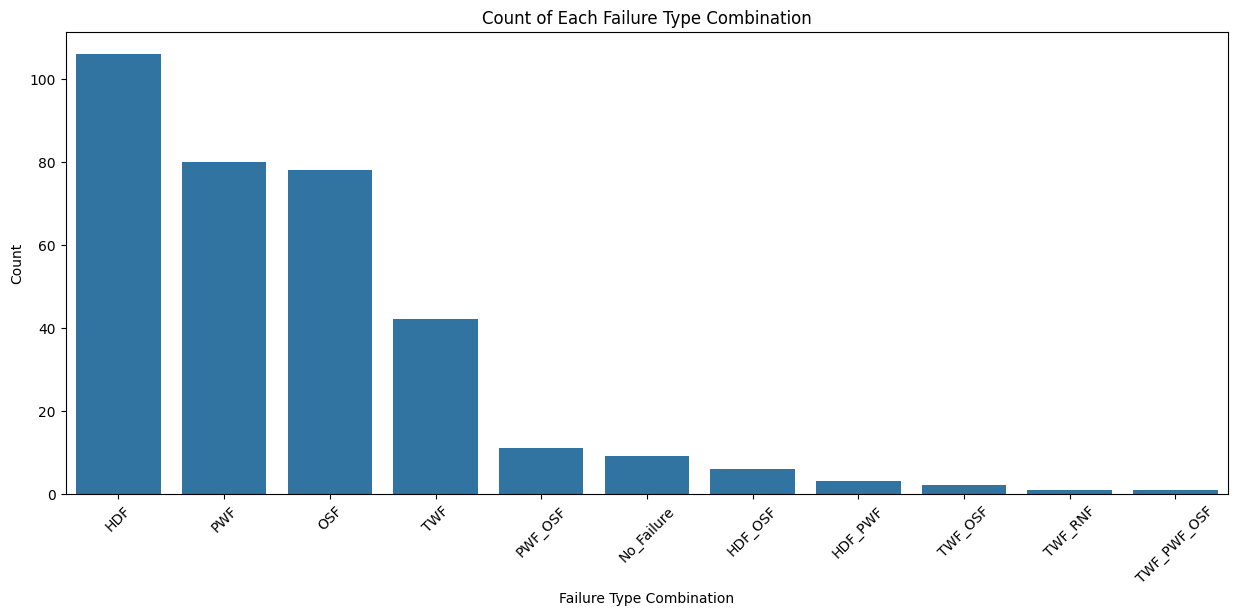

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


failures_df = data[data['Machine failure'] == 1].copy()
failures_df.head()
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
melted_failures_df = failures_df.melt(value_vars=failure_types, var_name='Failure Type', value_name='Occurred')
melted_failures_df = melted_failures_df[melted_failures_df['Occurred'] == 1]
sns.countplot(data=melted_failures_df, x='Failure Type')
plt.title('Count of Each Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()



# Create a new column 'Failure Combination' that concatenates the failure types for each row
failures_df['Failure Combination'] = failures_df.apply(
    lambda row: '_'.join([ftype for ftype in failure_types if row[ftype] == 1]) if any(row[ftype] == 1 for ftype in failure_types) else 'No_Failure',
    axis=1
)

# Count the occurrences of each unique combination of failures
combination_counts = failures_df['Failure Combination'].value_counts()

# Convert the Series to a DataFrame for plotting
combination_counts_df = combination_counts.reset_index()
combination_counts_df.columns = ['Failure Combination', 'Count']

plt.figure(figsize=(15, 6))
sns.barplot(data=combination_counts_df, x='Failure Combination', y='Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.title('Count of Each Failure Type Combination')
plt.xlabel('Failure Type Combination')
plt.ylabel('Count')
plt.show()



In [18]:
# Interestingly, there's machine failures which are undefined:

failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failures_with_no_type = data[(data['Machine failure'] == 1) & (data[failure_types].sum(axis=1) == 0)]

print(failures_with_no_type)

       UID Product ID Type  Air temperature [K]  Process temperature [K]  \
1437  1438     H30851    H                298.8                    309.9   
2749  2750     M17609    M                299.7                    309.2   
4044  4045     M18904    M                301.9                    310.9   
4684  4685     M19544    M                303.6                    311.8   
5536  5537     M20396    M                302.3                    311.8   
5941  5942     L53121    L                300.6                    310.7   
6478  6479     L53658    L                300.5                    309.8   
8506  8507     L55686    L                298.4                    309.6   
9015  9016     L56195    L                297.2                    308.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1437                    1439         45.2               40                1   
2749                    1685         28.9              179                1   
40